#Libraries

In [ ]:
!pip install split-folders
!pip install split-folders[full]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib
import pandas as pd # pandas
import natsort
import cv2
import os
import splitfolders

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from keras import backend as K

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

import skimage
from skimage.util import img_as_ubyte

from sklearn.metrics import classification_report,confusion_matrix

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

#Dataset 불러오기

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls -al /content/gdrive/MyDrive/project

total 5270757
drwx------  2 root root       4096 Dec 12 08:11 class
drwx------ 12 root root       4096 Dec 19 01:28 Data_10
-rw-------  1 root root     194650 Dec  7 13:29 ILSVRC2010_ground_truth.txt
-rw-------  1 root root 5397002240 Dec  7 13:46 ILSVRC2010_images_.tar
drwx------  2 root root       4096 Dec 15 10:14 input
drwx------  5 root root       4096 Dec 19 09:22 input_10
drwx------  2 root root       4096 Dec 15 10:14 input_5
drwx------  2 root root       4096 Dec 15 10:13 input_tvt
drwx------  2 root root       4096 Dec 15 16:45 input_tvt_1000class
drwx------  2 root root       4096 Dec 14 16:00 model
drwx------  2 root root       4096 Dec 20 05:26 model_alexnet
drwx------  2 root root       4096 Dec 14 10:57 output_5
drwx------  2 root root       4096 Dec 13 12:56 output_5class
drwx------  2 root root       4096 Dec 15 16:51 output_tvt
drwx------  2 root root       4096 Dec 20 02:25 result
drwx------  2 root root       4096 Dec 10 03:56 val


In [ ]:
os.chdir('/content/gdrive/MyDrive/project')

In [ ]:
#압축해제
#!tar -xvf /content/gdrive/MyDrive/project/ILSVRC2010_images_.tar

In [ ]:
!ls -al /content/gdrive/MyDrive/project

total 5270757
drwx------  2 root root       4096 Dec 12 08:11 class
drwx------ 12 root root       4096 Dec 19 01:28 Data_10
-rw-------  1 root root     194650 Dec  7 13:29 ILSVRC2010_ground_truth.txt
-rw-------  1 root root 5397002240 Dec  7 13:46 ILSVRC2010_images_.tar
drwx------  2 root root       4096 Dec 15 10:14 input
drwx------  5 root root       4096 Dec 19 09:22 input_10
drwx------  2 root root       4096 Dec 15 10:14 input_5
drwx------  2 root root       4096 Dec 15 10:13 input_tvt
drwx------  2 root root       4096 Dec 15 16:45 input_tvt_1000class
drwx------  2 root root       4096 Dec 14 16:00 model
drwx------  2 root root       4096 Dec 20 05:26 model_alexnet
drwx------  2 root root       4096 Dec 14 10:57 output_5
drwx------  2 root root       4096 Dec 13 12:56 output_5class
drwx------  2 root root       4096 Dec 15 16:51 output_tvt
drwx------  2 root root       4096 Dec 20 02:25 result
drwx------  2 root root       4096 Dec 10 03:56 val


In [ ]:
# 결과변수 불러오기
y = pd.read_csv('/content/gdrive/MyDrive/project/ILSVRC2010_ground_truth.txt', header=None, names=['answer'])
y

,answer
0,78
1,854
2,435
3,541
4,973
...,...
49995,467
49996,646
49997,68
49998,93


In [ ]:
#splitfolders.ratio("/content/gdrive/MyDrive/project/class", output="/content/gdrive/MyDrive/project/output_1000class", seed=1337, ratio=(.8, .1, .1))

In [ ]:
#10 classes
!ls -al /content/gdrive/MyDrive/project/Data_10

total 40
drwx------ 2 root root 4096 Dec 19 01:28 baseball
drwx------ 2 root root 4096 Dec 19 01:28 broom
drwx------ 2 root root 4096 Dec 19 01:28 french_fries
drwx------ 2 root root 4096 Dec 19 01:28 garage
drwx------ 2 root root 4096 Dec 19 01:28 giant_panda
drwx------ 2 root root 4096 Dec 19 01:28 granny_smith
drwx------ 2 root root 4096 Dec 19 01:28 hand_blower
drwx------ 2 root root 4096 Dec 19 01:28 jelly_fish
drwx------ 2 root root 4096 Dec 19 01:28 siamese_cat
drwx------ 2 root root 4096 Dec 19 01:28 theater_curtain


In [ ]:
!ls -al /content/gdrive/MyDrive/project/input_10

total 12
drwx------ 12 root root 4096 Dec 20 02:39 testdata
drwx------ 12 root root 4096 Dec 19 09:22 train
drwx------ 12 root root 4096 Dec 19 09:24 val


# Image Visualization

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import cv2
import natsort
%matplotlib inline

In [ ]:
name = ['baseball','broom','french_fries','garage','giant_panda','granny_smith','hand_blower','jelly_fish','siamese_cat','theater_curtain']

In [ ]:
import random
random_num = random.sample(range(0,50), 3)
random_num

[7, 31, 21]

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/project")

In [ ]:
# 경로불러오기
pro_path = '/content/gdrive/MyDrive/project/Data_10/'

img_arrs = []

for i in name:
  image_path = pro_path+i
  img_list = natsort.natsorted(os.listdir(image_path))

  for j in random_num:
    path = image_path +'/'+ img_list[j]
    img = cv2.imread(path)
    img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_arrs.append(img_color)


In [ ]:
len(img_arrs)

30

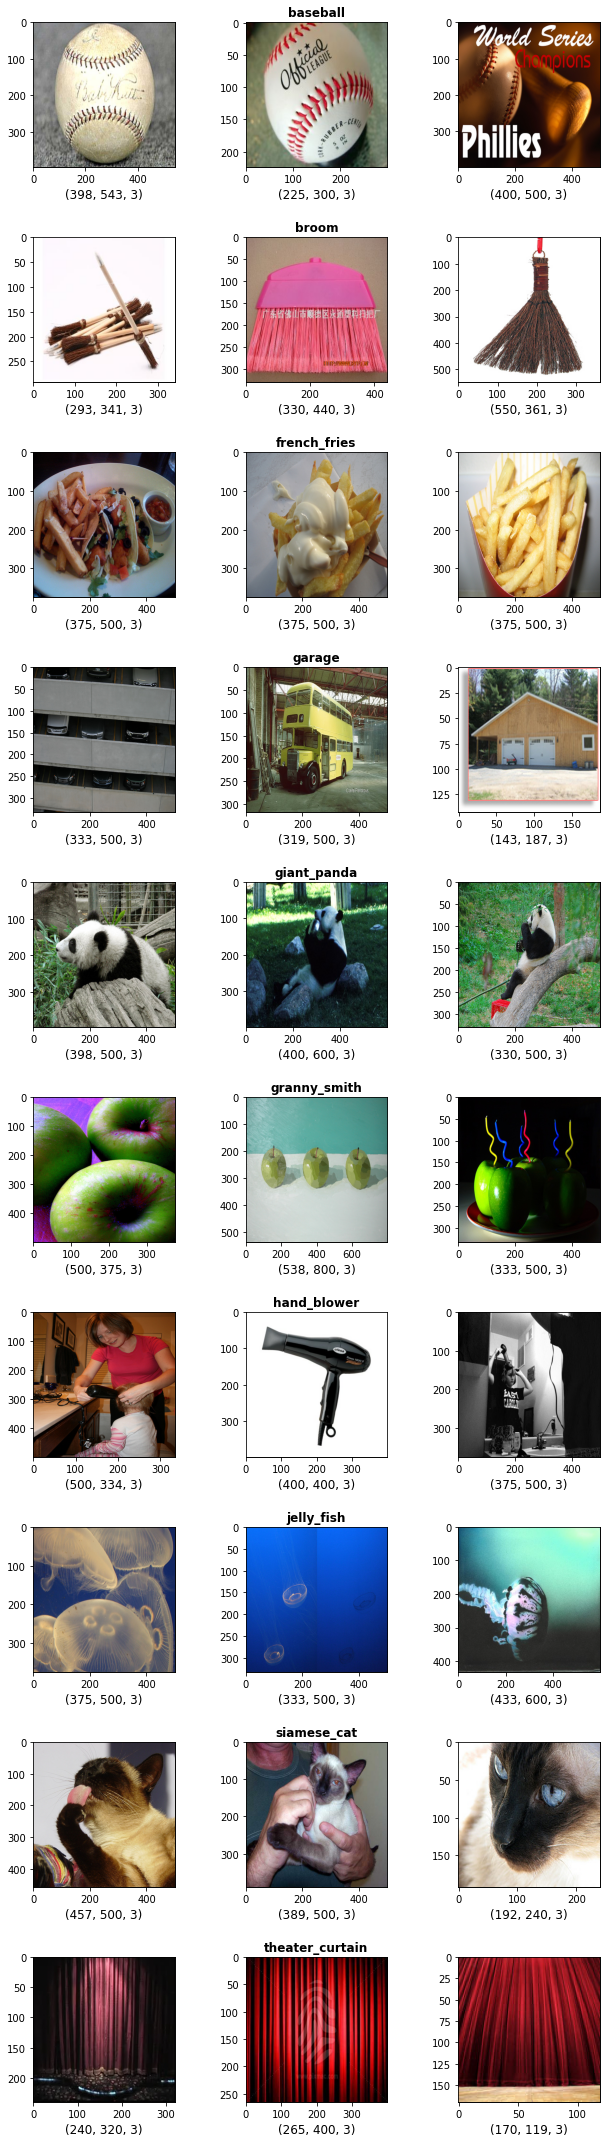

In [ ]:
rows = 10
columns = 3

# 그림판 설정
fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize = (columns*3, rows*3))

# 이미지 출력
for num in range(1, rows*columns+1):
  fig.add_subplot(rows, columns, num)
  idx = num -1

  plt.imshow(img_arrs[idx], aspect='auto')
  plt.xlabel(f'{img_arrs[idx].shape}', fontsize=12)

fig.tight_layout() # 이미지 사이 간격 조정

# 제목 설정
rows = ['baseball','broom','french_fries','garage','giant_panda','granny_smith','hand_blower','jelly_fish','siamese_cat','theater_curtain']

for folder_idx, ax in enumerate(axes.T[1]):
  ax.set_title(rows[folder_idx], fontweight ="bold")

for idx, ax in enumerate(axes.flat):
  ax.set_xticks([])
  ax.set_yticks([])

- Resize 필요 -> Alexnet을 쓸거기 때문에 227X227X3으로 Resize

#Image Resize

In [ ]:
#32 X 32 로 resize

labels = ['baseball','broom','french_fries','garage','giant_panda','granny_smith','hand_blower','jelly_fish','siamese_cat','theater_curtain']

img_size = 32

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

## Train, Valid, Test Split

In [ ]:
# 기존 validation set 을 test set으로 trainset을 8:2

train = get_data('/content/gdrive/MyDrive/project/input_10/train')
valid = get_data('/content/gdrive/MyDrive/project/input_10/val')
test=get_data('/content/gdrive/MyDrive/project/input_10/testdata')

<ipython-input-67-e9f2985e5bbf>:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
print(train.shape)
print(valid.shape)
print(test.shape)

(12744, 2)
(1421, 2)
(500, 2)


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in valid:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

In [ ]:
x_train

[array([[[  1,   1,   1],
         [ 29,  29,  29],
         [ 16,  16,  16],
         ...,
         [ 71,  71,  71],
         [ 29,  29,  29],
         [108, 108, 108]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [ 20,  20,  20],
         ...,
         [ 55,  55,  55],
         [ 28,  28,  28],
         [  1,   1,   1]],
 
        [[  0,   0,   0],
         [  1,   1,   1],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
         [  3,   3,   3],
         [ 93,  93,  93]],
 
        ...,
 
        [[ 43,  43,  43],
         [  0,   0,   0],
         [  3,   3,   3],
         ...,
         [  0,   0,   0],
         [ 22,  22,  22],
         [ 19,  19,  19]],
 
        [[  3,   3,   3],
         [  9,   9,   9],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  9,   9,   9],
         [ 33,  33,  33]],
 
        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  1,   1,   1],
  

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape, y_val.shape, y_test.shape)

(12744, 10) (1421, 10) (500, 10)


In [ ]:
# Normalize data

x_train = np.array(x_train)/225
x_val = np.array(x_val)/225
x_test=np.array(x_test)/225

# Reshape data
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_val)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(12744, 32, 32, 3)
(12744, 10)
(1421, 32, 32, 3)
(1421, 10)
(500, 32, 32, 3)
(1421, 10)


In [ ]:
num_classes = y_train.shape[1]
input_shape=x_train.shape[1:]

input_shape,num_classes

((32, 32, 3), 10)

## Modeling

In [ ]:
# Define Alexnet Model

def AlexnetModel(input_shape,num_classes):

  model = Sequential()

  model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=input_shape, activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
  model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(num_classes,activation='softmax'))

  return model

In [ ]:
# Simple CNN

def get_model(input_shape,num_classes):

  model = Sequential()

  model.add(Conv2D(32,(3,3),input_shape=input_shape,padding='same',activation='relu'))
  model.add(Dropout(0.2))

  model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(Dropout(0.2))

  model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dropout(0.2))

  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(num_classes,activation='softmax'))

  return model

### Model Parameters

In [ ]:
model_type = 'Alexnet'

epochs = 25
lrate = 0.01
decay = lrate/epochs
batch_size = 128

data_augmentation = True
flow_from_dir = False

subtract_mean = True
seed = 7
np.random.seed(seed)

validate_dir = os.path.join("data","test")
train_dir = os.path.join("data","train")

save_dir = os.path.join(os.getcwd(), 'saved_models')

model_name = 'alexnet %s_model.{epoch:03d}.h5' % model_type

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print("Model Type: ",model_type)
print("Model File: ",filepath)

Model Type:  Alexnet
Model File:  /content/gdrive/MyDrive/project/saved_models/alexnet Alexnet_model.{epoch:03d}.h5


In [ ]:
if model_type == 'Alexnet':
  model = AlexnetModel(input_shape,num_classes)
else:
  model = get_model(input_shape,num_classes)

# Compile model

#optimizer = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss= 'categorical_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
print("Model Summary of ",model_type)

print(model.summary())

Model Summary of  Alexnet
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 96)          2688      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 96)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 256)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 384)         885120    
                                                                 
 conv2d_8 (Conv2D)          

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### DataGenerator

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=True,
        samplewise_center=False,
        featurewise_std_normalization=True,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

### Fitting

In [ ]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [ ]:
# Early Stopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)

filepath='/content/gdrive/MyDrive/project/model_alexnet3'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

lr_scheduler = LearningRateScheduler(lr_schedule)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

callbacks = [checkpoint, lr_reducer, lr_scheduler,early_stopping]

In [ ]:
history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                                 epochs=epochs,
                                 validation_data=datagen.flow((x_val, y_val),batch_size=batch_size),
                                 workers=4,
                                 callbacks=callbacks)

Learning rate:  0.001
Epoch 1/25
100/100 [==============================] - ETA: 0s - loss: 1.8562 - accuracy: 0.3385
Epoch 1: val_accuracy improved from -inf to 0.48205, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 254s 3s/step - loss: 1.8562 - accuracy: 0.3385 - val_loss: 1.4918 - val_accuracy: 0.4821 - lr: 0.0010
Learning rate:  0.001
Epoch 2/25
100/100 [==============================] - ETA: 0s - loss: 1.4974 - accuracy: 0.4975
Epoch 2: val_accuracy improved from 0.48205 to 0.51795, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 261s 3s/step - loss: 1.4974 - accuracy: 0.4975 - val_loss: 1.4269 - val_accuracy: 0.5179 - lr: 0.0010
Learning rate:  0.001
Epoch 3/25
100/100 [==============================] - ETA: 0s - loss: 1.3797 - accuracy: 0.5454
Epoch 3: val_accuracy improved from 0.51795 to 0.56087, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 270s 3s/step - loss: 1.3797 - accuracy: 0.5454 - val_loss: 1.3262 - val_accuracy: 0.5609 - lr: 0.0010
Learning rate:  0.001
Epoch 4/25
100/100 [==============================] - ETA: 0s - loss: 1.3218 - accuracy: 0.5621
Epoch 4: val_accuracy improved from 0.56087 to 0.58480, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 256s 3s/step - loss: 1.3218 - accuracy: 0.5621 - val_loss: 1.2833 - val_accuracy: 0.5848 - lr: 0.0010
Learning rate:  0.001
Epoch 5/25
100/100 [==============================] - ETA: 0s - loss: 1.2921 - accuracy: 0.5762
Epoch 5: val_accuracy improved from 0.58480 to 0.59747, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 264s 3s/step - loss: 1.2921 - accuracy: 0.5762 - val_loss: 1.2362 - val_accuracy: 0.5975 - lr: 0.0010
Learning rate:  0.001
Epoch 6/25
100/100 [==============================] - ETA: 0s - loss: 1.2331 - accuracy: 0.5991
Epoch 6: val_accuracy improved from 0.59747 to 0.60028, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 298s 3s/step - loss: 1.2331 - accuracy: 0.5991 - val_loss: 1.2071 - val_accuracy: 0.6003 - lr: 0.0010
Learning rate:  0.001
Epoch 7/25
100/100 [==============================] - ETA: 0s - loss: 1.2198 - accuracy: 0.6058
Epoch 7: val_accuracy improved from 0.60028 to 0.60943, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 292s 3s/step - loss: 1.2198 - accuracy: 0.6058 - val_loss: 1.1751 - val_accuracy: 0.6094 - lr: 0.0010
Learning rate:  0.001
Epoch 8/25
100/100 [==============================] - ETA: 0s - loss: 1.1832 - accuracy: 0.6148
Epoch 8: val_accuracy improved from 0.60943 to 0.63125, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 270s 3s/step - loss: 1.1832 - accuracy: 0.6148 - val_loss: 1.1454 - val_accuracy: 0.6312 - lr: 0.0010
Learning rate:  0.001
Epoch 9/25
100/100 [==============================] - ETA: 0s - loss: 1.1712 - accuracy: 0.6202
Epoch 9: val_accuracy did not improve from 0.63125
100/100 [==============================] - 256s 3s/step - loss: 1.1712 - accuracy: 0.6202 - val_loss: 1.1370 - val_accuracy: 0.6242 - lr: 0.0010
Learning rate:  0.001
Epoch 10/25
100/100 [==============================] - ETA: 0s - loss: 1.1312 - accuracy: 0.6309
Epoch 10: val_accuracy did not improve from 0.63125
100/100 [==============================] - 265s 3s/step - loss: 1.1312 - accuracy: 0.6309 - val_loss: 1.1917 - val_accuracy: 0.6129 - lr: 0.0010
Learning rate:  0.001
Epoch 11/25
100/100 [==============================] - ETA: 0s - loss: 1.1332 - accuracy: 0.6319
Epoch 11: val_accuracy did not improve from 0.63125
100/100 [==============================] - 260s 3s/ste

100/100 [==============================] - 258s 3s/step - loss: 1.0851 - accuracy: 0.6438 - val_loss: 1.0763 - val_accuracy: 0.6481 - lr: 0.0010
Learning rate:  0.001
Epoch 14/25
100/100 [==============================] - ETA: 0s - loss: 1.0674 - accuracy: 0.6537
Epoch 14: val_accuracy improved from 0.64814 to 0.65728, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 255s 3s/step - loss: 1.0674 - accuracy: 0.6537 - val_loss: 1.0570 - val_accuracy: 0.6573 - lr: 0.0010
Learning rate:  0.001
Epoch 15/25
100/100 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.6671
Epoch 15: val_accuracy did not improve from 0.65728
100/100 [==============================] - 263s 3s/step - loss: 1.0295 - accuracy: 0.6671 - val_loss: 1.0969 - val_accuracy: 0.6327 - lr: 0.0010
Learning rate:  0.001
Epoch 16/25
100/100 [==============================] - ETA: 0s - loss: 1.0363 - accuracy: 0.6663
Epoch 16: val_accuracy improved from 0.65728 to 0.66080, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 264s 3s/step - loss: 1.0363 - accuracy: 0.6663 - val_loss: 1.0514 - val_accuracy: 0.6608 - lr: 0.0010
Learning rate:  0.001
Epoch 17/25
100/100 [==============================] - ETA: 0s - loss: 1.0118 - accuracy: 0.6734
Epoch 17: val_accuracy improved from 0.66080 to 0.66432, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 257s 3s/step - loss: 1.0118 - accuracy: 0.6734 - val_loss: 1.0287 - val_accuracy: 0.6643 - lr: 0.0010
Learning rate:  0.001
Epoch 18/25
100/100 [==============================] - ETA: 0s - loss: 0.9972 - accuracy: 0.6767
Epoch 18: val_accuracy improved from 0.66432 to 0.66573, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 264s 3s/step - loss: 0.9972 - accuracy: 0.6767 - val_loss: 1.0279 - val_accuracy: 0.6657 - lr: 0.0010
Learning rate:  0.001
Epoch 19/25
100/100 [==============================] - ETA: 0s - loss: 0.9970 - accuracy: 0.6751
Epoch 19: val_accuracy did not improve from 0.66573
100/100 [==============================] - 252s 3s/step - loss: 0.9970 - accuracy: 0.6751 - val_loss: 1.0345 - val_accuracy: 0.6622 - lr: 0.0010
Learning rate:  0.001
Epoch 20/25
100/100 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.6839
Epoch 20: val_accuracy improved from 0.66573 to 0.68051, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 254s 3s/step - loss: 0.9782 - accuracy: 0.6839 - val_loss: 0.9803 - val_accuracy: 0.6805 - lr: 0.0010
Learning rate:  0.001
Epoch 21/25
100/100 [==============================] - ETA: 0s - loss: 0.9652 - accuracy: 0.6879
Epoch 21: val_accuracy did not improve from 0.68051
100/100 [==============================] - 246s 2s/step - loss: 0.9652 - accuracy: 0.6879 - val_loss: 0.9811 - val_accuracy: 0.6805 - lr: 0.0010
Learning rate:  0.001
Epoch 22/25
100/100 [==============================] - ETA: 0s - loss: 0.9457 - accuracy: 0.6959
Epoch 22: val_accuracy did not improve from 0.68051
100/100 [==============================] - 240s 2s/step - loss: 0.9457 - accuracy: 0.6959 - val_loss: 0.9769 - val_accuracy: 0.6791 - lr: 0.0010
Learning rate:  0.001
Epoch 23/25
100/100 [==============================] - ETA: 0s - loss: 0.9304 - accuracy: 0.6940
Epoch 23: val_accuracy improved from 0.68051 to 0.68614, saving model to /content/gdrive/MyDrive/project

100/100 [==============================] - 240s 2s/step - loss: 0.9304 - accuracy: 0.6940 - val_loss: 0.9715 - val_accuracy: 0.6861 - lr: 0.0010
Learning rate:  0.001
Epoch 24/25
100/100 [==============================] - ETA: 0s - loss: 0.9352 - accuracy: 0.6997
Epoch 24: val_accuracy did not improve from 0.68614
100/100 [==============================] - 237s 2s/step - loss: 0.9352 - accuracy: 0.6997 - val_loss: 0.9865 - val_accuracy: 0.6798 - lr: 0.0010
Learning rate:  0.001
Epoch 25/25
100/100 [==============================] - ETA: 0s - loss: 0.9143 - accuracy: 0.7039
Epoch 25: val_accuracy improved from 0.68614 to 0.68754, saving model to /content/gdrive/MyDrive/project/model_alexnet3


100/100 [==============================] - 248s 2s/step - loss: 0.9143 - accuracy: 0.7039 - val_loss: 0.9370 - val_accuracy: 0.6875 - lr: 0.0010


### Acc, Loss Plot

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


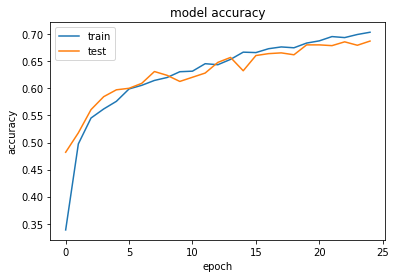

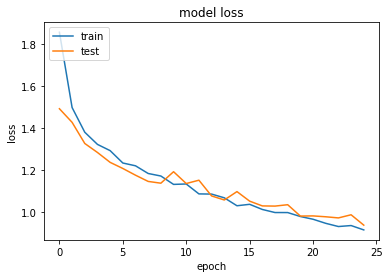

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Evaluate

In [ ]:
scores = model.evaluate(x_val, y_val, verbose=1)

45/45 [==============================] - 4s 88ms/step - loss: 4.2628 - accuracy: 0.3188


In [ ]:
print('Accuracy Score = ',np.max(history.history['val_accuracy']))

Accuracy Score =  0.6875439882278442
